In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
tourist = pd.read_csv("tourist_2019_통합.csv", index_col = 0)
upload = pd.read_csv("upload_2019_통합.csv", index_col=0)

In [3]:
tourist.head()

,arrival,arrival_2019,arrival_2020,arriaval_2021
2019-04-01/2019-04-07,W01,1012309,386064,1144950
2019-04-08/2019-04-14,W02,1019195,366750,1323918
2019-04-15/2019-04-21,W03,1003633,419150,1360393
2019-04-22/2019-04-28,W04,1055993,507611,1407969
2019-04-29/2019-05-05,W05,1105751,872686,1367863


In [4]:
upload.head()

,upload,upload_2019,upload_2020,upload_2021
2019-04-01/2019-04-07,W01,1483,1019,2640
2019-04-08/2019-04-14,W02,1561,965,3285
2019-04-15/2019-04-21,W03,1556,988,3739
2019-04-22/2019-04-28,W04,1351,1086,3792
2019-04-29/2019-05-05,W05,1499,1244,3426


In [5]:
df = pd.concat([tourist, upload], axis=1)
df.head()

,arrival,arrival_2019,arrival_2020,arriaval_2021,upload,upload_2019,upload_2020,upload_2021
2019-04-01/2019-04-07,W01,1012309,386064,1144950,W01,1483,1019,2640
2019-04-08/2019-04-14,W02,1019195,366750,1323918,W02,1561,965,3285
2019-04-15/2019-04-21,W03,1003633,419150,1360393,W03,1556,988,3739
2019-04-22/2019-04-28,W04,1055993,507611,1407969,W04,1351,1086,3792
2019-04-29/2019-05-05,W05,1105751,872686,1367863,W05,1499,1244,3426


In [6]:
df.drop(['arrival','upload'], inplace=True, axis =1)

# method1

<AxesSubplot:title={'center':'Person Correlation of Features'}>

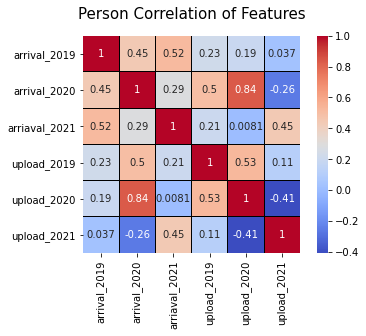

In [7]:
colormap = plt.cm.coolwarm
# plt.figure(figsize=(8, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), 
            linewidths = 0.01, 
            #vmax = 1.0, 
            square = True, 
            cmap = colormap, 
            linecolor = "black", 
            annot = True)

# method2

In [8]:
#변수간의 상관관계 구하기
df1 = df.corr()
df1

,arrival_2019,arrival_2020,arriaval_2021,upload_2019,upload_2020,upload_2021
arrival_2019,1.000000,0.446912,0.519115,0.225783,0.194937,0.036775
arrival_2020,0.446912,1.000000,0.287438,0.504657,0.839926,-0.255817
arriaval_2021,0.519115,0.287438,1.000000,0.205600,0.008117,0.445870
upload_2019,0.225783,0.504657,0.205600,1.000000,0.528199,0.114458
upload_2020,0.194937,0.839926,0.008117,0.528199,1.000000,-0.408642
upload_2021,0.036775,-0.255817,0.445870,0.114458,-0.408642,1.000000


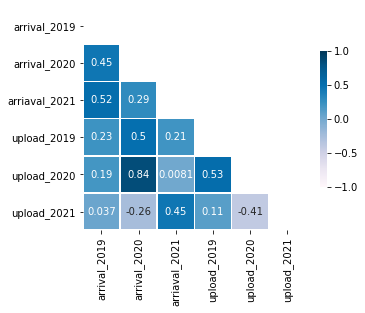

In [9]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(5,5) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, 
            cmap = 'PuBu', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            square = True,
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()